In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 

from keras.models import Model, Sequential
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from PIL import Image

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # disable warning

In [2]:
print(keras.__version__)

2.4.3


## Model

In [3]:
# Sequential visual model
model = Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(224, 224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [4]:
# Load the model
model.load_weights('trainset/vgg_face_weights.h5')

In [5]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [6]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
epsilon = 0.40

def verifyFace(image1, image2):
    img1 = vgg_face_descriptor.predict(preprocess_image(".\\data\\%s" % (image1)))[0,:] # use \\ for windows
    img2 = vgg_face_descriptor.predict(preprocess_image(".\\data\\%s" % (image2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1, img2)
    euclidean_distance = findEuclideanDistance(img1, img2)
    
    print("Cosine similarity: ", cosine_similarity)
    print("Euclidean distance: ", euclidean_distance)
    
    if(cosine_similarity < epsilon):
        print("They are the same person!")
    else:
        print("They are NOT the same person!")
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img(".\\data\\/%s" % (image1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img(".\\data\\%s" % (image2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)

## Testing

Cosine similarity:  0.2091386914253235
Euclidean distance:  57.04367
They are the same person!


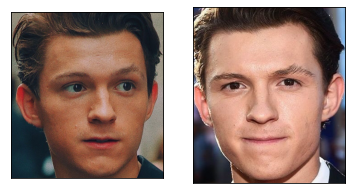

In [7]:
verifyFace("tom.jpg", "tom1.jpg")

Cosine similarity:  0.5164353549480438
Euclidean distance:  113.9129
They are NOT the same person!


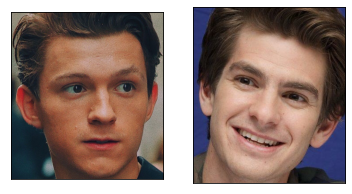

In [8]:
verifyFace("tom.jpg", "andrew.jpg")

Cosine similarity:  0.24775946140289307
Euclidean distance:  71.78924
They are the same person!


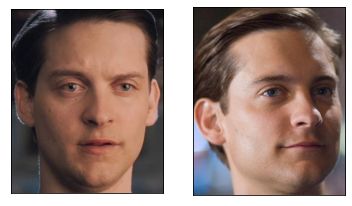

In [9]:
verifyFace("peter.jpg", "peter1.jpg")

Cosine similarity:  0.47962164878845215
Euclidean distance:  112.63363
They are NOT the same person!


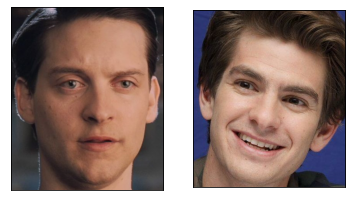

In [10]:
verifyFace("peter.jpg", "andrew.jpg")